In [9]:
#Imports
import matplotlib.pyplot as plt

In [10]:
#Define input parameters
STATIC_FILE= "static.txt"
PATH= "../resources/"
NEIGHBORS_FILE= "output.txt"
PARTICLE_SELECTED= 24

In [11]:
#Create auxiliary classes
class Particle:
  def __init__(self, r, rc):
    self.r = r
    self.rc = rc
    
class Point:
  def __init__(self, x, y):
    self.x= x
    self.y= y
    
class Circle:
  def __init__(self, r, x, y):
    self.r= r
    self.x= x
    self.y= y

In [12]:
#Open static files
static = open(PATH + STATIC_FILE, "r")

n= int(static.readline()) #First line N
l= int(static.readline()) #Second line L

partSizes= static.readlines()

particles= []

for line in partSizes:
    r, rc= line.split("\t")
    particles.append(Particle(float(r), float(rc)))

In [15]:
def visualize(dinamicFile, neighborFile, selectedParticle):
    #Open dinamic
    dinamic = open(PATH + dinamicFile, "r")

    dinamic.readline() #First line is time

    partPos= dinamic.readlines()

    particleCoord= []

    for line in partPos:
        x, y= line.split("\t")
        particleCoord.append(Point(float(x), float(y)))
    
    #Open neighbors file
    neighborsFile = open(PATH + neighborFile, "r")

    neighborsLines= neighborsFile.readlines()
    neighborsAux= []
    neighbors= []

    #Split the selected line to get all neighbors
    neighborsAux.append(neighborsLines[selectedParticle].split(" "))


    for neig in neighborsAux[0]:
        try:
            neighbors.append(int(neig)) #Particle's neighbors are stored in neighbors array
        except: SyntaxError #Ignore the '\n'

    #Create the image
    plt.figure(figsize=(8,8))
    plt.axis([0, l, 0, l])
    plt.axis('square')
    plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.5)

    circles= []

    for i in range(n):
        particleColor= 'gray'
        transparency= 0.5
        if i in neighbors:
            particleColor= 'green'
            transparency= 1
        if i == selectedParticle:
            particleColor= 'red'
            transparency= 1
            circles.append(plt.Circle((particleCoord[i].x, particleCoord[i].y), radius=particles[i].r+1, color=particleColor, alpha=0.1))
        circles.append(plt.Circle((particleCoord[i].x, particleCoord[i].y), radius=particles[i].r, color=particleColor, alpha=transparency))
        plt.gca().add_artist(circles[i])

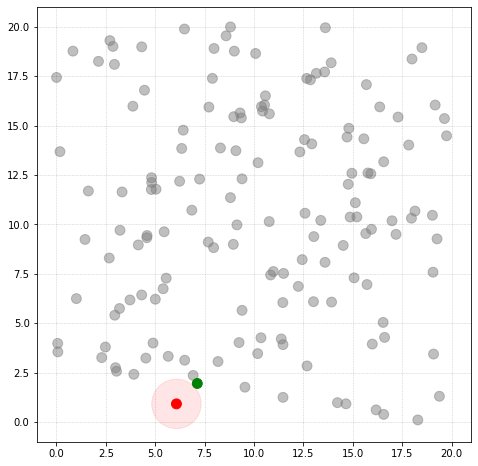

In [16]:
visualize('dinamic.txt', 'output.txt', 20)

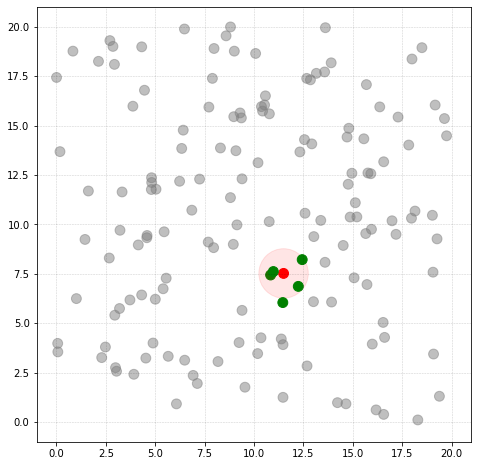

In [17]:
visualize('dinamic.txt', 'output.txt', 19)